In [1]:
# import stuff

import numpy as np
import math as m
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats
import os


# change this with the folder where you have saved the file
os.chdir('C:\\Users\\nicol\\Desktop\\pythonfiles\\micrometereology\\02')

In [24]:
# FUNCTIONS


def plot_format_instabilities_ustar():
    plt.rc('font', size=14)
    plt.rc('axes', titlesize=14)
    plt.rc('axes', labelsize=14)
    plt.xlabel('Normalized wind speed U/u*')
    plt.ylabel('log z [m]')
    plt.legend(loc='lower right')
    plt.title('Normalized wind profiles for different stabilities')

    plt.yscale("log")
    #plt.ylim(0.1,120)
    #plt.xlim(0,30)

    plt.show()


def plot_format_instabilities():
    plt.rc('font', size=12)
    plt.rc('axes', titlesize=14)
    plt.rc('axes', labelsize=14)
    plt.xlabel('Wind speed U [m/s]')
    plt.ylabel('log z [m]')
    plt.legend(loc='lower right')
    plt.title('Wind profiles for different stabilities')

    plt.yscale("log")
    #plt.ylim(0.1,120)
    #plt.xlim(0,30)

    plt.show()



def get_U(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    u_star = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            if abs(Lreciprocal[i]) <= 0.0008:
                V_all.append([V10[i], V40[i], V60[i], V80[i], V100[i]])
                u_star.append(ustar[i])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    ustar_mean = np.mean(u_star)


    return U, U_std, ustar_mean

def get_U_veryn(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    u_star = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            if abs(Lreciprocal[i]) <= 0.000008:
                V_all.append([V10[i], V40[i], V60[i], V80[i], V100[i]])
                u_star.append([ustar[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    ustar_mean = np.mean(u_star, axis=0)

    print(f"number of neutral = {len(u_star):.2f}")

    return U, U_std, ustar_mean

def get_U_s(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    u_star = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            if  0.0008 < Lreciprocal[i] < 0.05:
                V_all.append([V10[i], V40[i], V60[i], V80[i], V100[i]])
                u_star.append([ustar[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    ustar_mean = np.mean(u_star, axis=0)

    #print(f"number of stable = {len(u_star):.2f}")

    return U, U_std, ustar_mean

def get_U_u(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    u_star = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            if  -0.05 < Lreciprocal[i] < -0.0008:
                V_all.append([V10[i], V40[i], V60[i], V80[i], V100[i]])
                u_star.append([ustar[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    ustar_mean = np.mean(u_star, axis=0)

    #print(f"number of unstable= {len(u_star):.2f}")

    return U, U_std, ustar_mean   

def get_U_all(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    u_star = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            V_all.append([V10[i], V40[i], V60[i], V80[i], V100[i]])
            u_star.append(ustar[i])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    ustar_mean = np.mean(u_star)
    return U, U_std, ustar_mean   


def get_Unorm_n(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            if abs(Lreciprocal[i]) < 0.0008:
                V_all.append([V10[i]/ustar[i], V40[i]/ustar[i], V60[i]/ustar[i], V80[i]/ustar[i], V100[i]/ustar[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    return U, U_std

def get_Unorm_s(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            if  0.0008 < Lreciprocal[i] < 0.05:
                V_all.append([V10[i]/ustar[i], V40[i]/ustar[i], V60[i]/ustar[i], V80[i]/ustar[i], V100[i]/ustar[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    return U, U_std

def get_Unorm_u(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            if  -0.05 < Lreciprocal[i] < -0.0008:
                V_all.append([V10[i]/ustar[i], V40[i]/ustar[i], V60[i]/ustar[i], V80[i]/ustar[i], V100[i]/ustar[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    return U, U_std

def get_Unorm_all(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            V_all.append([V10[i]/ustar[i], V40[i]/ustar[i], V60[i]/ustar[i], V80[i]/ustar[i], V100[i]/ustar[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    return U, U_std


def plot_histogram(array_data, num, color, label):
    # plots the histogram of an array of data
    x = np.linspace(min(array_data), max(array_data), num=num)
    y = np.histogram(array_data, bins=num, density=True)
    delta = num/100000
    #width_bar = (max(array_data) - min(array_data)) / num + delta
    width_bar = (max(array_data) - min(array_data)) / num
    plt.bar(x, y[0], width=width_bar, align='center', color=color, label=label)
    #area = np.sum(y[0]*(width_bar-delta))
    area = np.sum(y[0]*(width_bar))
    print(f"area under graph = {area:.5f}")


def plot_Gaussian(array_data, mu, sig, num, color, label):
    # computes the gaussian distribution given mu and sig and plots it in the range of the data to avoid zeros
    x = np.linspace(min(array_data), max(array_data), num=num)
    x = np.linspace(-10, 10, num=num)
    y = 1/(sig*np.sqrt(2*np.pi)) * np.exp(-1/2*((x-mu)/sig)**2)
    plt.plot(x, y, color=color, label=label)


def linear_regression(x,y):
    x_ave = np.sum(x)/len(x)
    y_ave = np.sum(y)/len(y)
    squaresumx = np.sum((x-x_ave)**2)
    squaresumy = np.sum((y-y_ave)**2)
    crossterm = np.sum((x-x_ave)*(y-y_ave))
    slope = crossterm/squaresumx
    intercept = y_ave - slope*x_ave
    return slope, intercept

def plot_linear_regression_logy(slope, intercept, x, y, color, label):
    x_interpol = np.insert(x, 0, 0)
    x_interpol = np.append(x_interpol, x_interpol[-1]+0.5)
    y_interpol = x_interpol * slope + intercept
    plt.plot(x_interpol, np.exp(y_interpol), color=color, label=label)


def plot_linear_regression_logxlogy(slope, intercept, x, y, color, label):
    x_interpol = np.insert(x, 0, 0)
    x_interpol = np.append(x_interpol, x_interpol[-1]+0.5)
    y_interpol = x_interpol * slope + intercept
    plt.plot(np.exp(x_interpol), np.exp(y_interpol), color=color, label=label)
    print('first value',np.exp(y_interpol[0]) )


        

In [3]:
# DATA

data = pd.read_csv('Hoevsoere2008.csv', delimiter=',', header=0, 
                    names=['time','ustar','Q0','direction','theta0', 'V10', 'V40','V60','V80','V100'])

ustar = data['ustar'].values
Q0 = data['Q0'].values
direction = data['direction'].values
theta0 = data['theta0'].values
V10 = data['V10'].values
V40 = data['V40'].values
V60 = data['V60'].values
V80 = data['V80'].values
V100 = data['V100'].values

theta0 = np.array(theta0) - 273.15

k = 0.4
g = 9.81
Lreciprocal =  k*g/theta0 * (-Q0/ustar**3)
z = [10,40,60,80,100]

all data: mean=0.01, std=0.24
area under graph = 1.00000


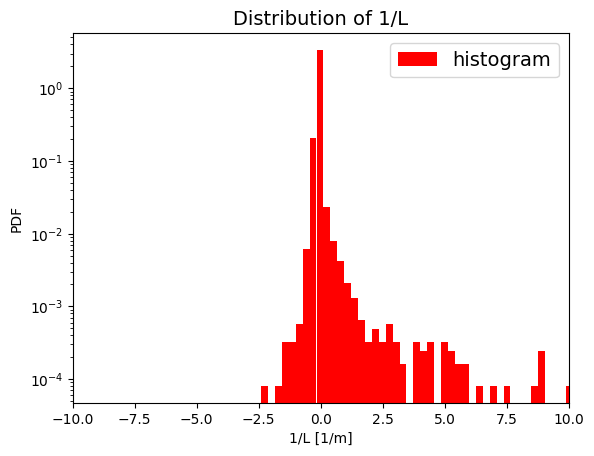

In [4]:
# QUESTION 1


Lreciprocal_mean = np.mean(Lreciprocal)    #= mu
Lreciprocal_std = np.std(Lreciprocal)      #= sigma
print(f"all data: mean={Lreciprocal_mean:.2f}, std={Lreciprocal_std:.2f}")
plot_histogram(Lreciprocal, 100,'r', 'histogram')
plt.yscale("log")

plt.rc('font', size=14)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.xlabel('1/L [1/m]')
plt.ylabel('PDF')
plt.legend(loc='upper right')
plt.title('Distribution of 1/L')
plt.xlim(-10,10)

plt.show()


In [5]:

total = len(Lreciprocal)

between = []

for i in range(len(Lreciprocal)):
    if -5 < Lreciprocal[i] < 5:
        between.append(Lreciprocal[i])

print('total', total)
print('in between', len(between))

print(f"percentage data between -5 and 5 = {len(between)/total*100:.2f}")

Lsorted = np.sort(Lreciprocal)
Lsorted_reverse = Lsorted[::-1]
print(Lsorted_reverse[0:10])




total 44867
in between 44846
percentage data between -5 and 5 = 99.95
[25.38636243 13.95634126 12.82380544 10.06408549  9.04355908  9.01043439
  8.94319392  8.66922923  7.61654587  6.90579766]


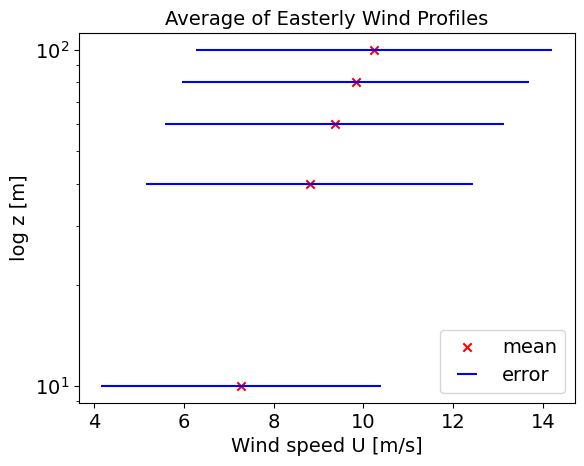

In [6]:
# QUESTION 2
# a

U, U_std, ustar_mean = get_U(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
x_error = U_std
plt.errorbar(U, z, xerr = x_error, fmt ='none', color='b', label='error')
plt.scatter(U, z, marker='x', color='r', label='mean')

std_average = np.mean(U_std, axis=0)

plt.xlabel('Wind speed U [m/s]')
plt.ylabel('log z [m]')
plt.legend(loc='lower right')
plt.title('Average of Easterly Wind Profiles')

plt.yscale("log")


Equation of the line: y = 0.82766 x -3.68004


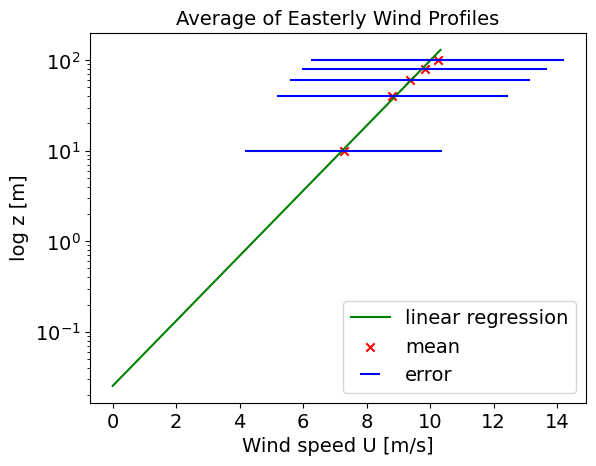

In [7]:
# QUESTION 2b

x = U[:-1]
y = z[:-1]
slopeb, interceptb = linear_regression(x,np.log(y))
print(f"Equation of the line: y = {slopeb:.5f} x {interceptb:.5f}")
plot_linear_regression_logy(slopeb, interceptb, x, y, color='g', label='linear regression')
plt.errorbar(U, z, xerr = x_error, fmt ='none', color='b', label='error')
plt.scatter(U, z, marker='x', color='r', label='mean')


plt.xlabel('Wind speed U [m/s]')
plt.ylabel('log z [m]')
plt.legend(loc='lower right')
plt.title('Average of Easterly Wind Profiles')

plt.yscale("log")

plt.show()

In [8]:
# QUESTION 2c

slope, intercept = linear_regression(U[:-1], np.log(z[:-1]))

z0c = np.exp(intercept)
ustarc = k/slope
print(f"mean values of ustar = {ustarc:.2f} and zo = {z0c:.2f}")

Umax = U + U_std
Umin = U - U_std

slopemin, interceptmin = linear_regression(Umin[:-1], np.log(z[:-1]))

z0cmin = np.exp(interceptmin)
ustarcmin = k/slopemin
print(f"min values of ustar = {ustarcmin:.2f} and zo = {z0cmin:.2f}")

slopemax, interceptmax = linear_regression(Umax[:-1], np.log(z[:-1]))

z0cmax = np.exp(interceptmax)
ustarcmax = k/slopemax
print(f"max values of ustar = {ustarcmax:.2f} and zo = {z0cmax:.2f}")



mean values of ustar = 0.48 and zo = 0.03
min values of ustar = 0.34 and zo = 0.08
max values of ustar = 0.63 and zo = 0.01


U100 mean          = 10.23
U100 from 60       = 9.98 with percentage difference = 2.46 % 
U100 from 80       = 10.10 with percentage difference = 1.34 % 
U100 from 60 prof  = 9.97 with percentage difference = 2.60 % 
U100 from 80 prof  = 10.09 with percentage difference = 1.40 % 
U100 from 60 delta = 10.15 with percentage difference = 0.80 % 
U100 from 80 delta = 10.12 with percentage difference = 1.09 % 


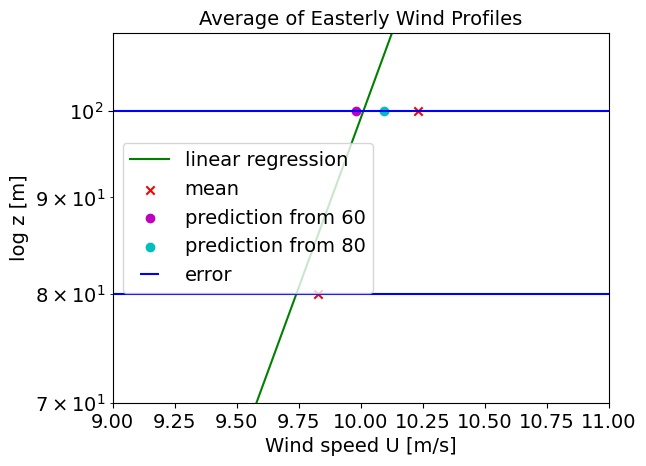

In [10]:
# QUESTION 2d

plot_linear_regression_logy(slopeb, interceptb, x, y, color='g', label='linear regression')
plt.errorbar(U, z, xerr = x_error, fmt ='none', color='b', label='error')
plt.scatter(U, z, marker='x', color='r', label='mean')


U60_mean = U[2]
U80_mean = U[3]
U100_mean = U[4]
z60 = z[2]
z80 = z[3]
z100 = z[4]

U100_60 = (np.log(z100)-np.log(z60))/slope + U60_mean
U100_80 = (np.log(z100)-np.log(z80))/slope + U80_mean

U100_60_prof = ustar_mean/k * np.log(z100/z60) + U60_mean
U100_80_prof = ustar_mean/k * np.log(z100/z80) + U80_mean

U100_60_delta = (z100 - z60)*ustar_mean/(k*z60) + U60_mean
U100_80_delta = (z100 - z80)*ustar_mean/(k*z80) + U80_mean

print(f"U100 mean          = {U100_mean:.2f}")
print(f"U100 from 60       = {U100_60:.2f} with percentage difference = {abs((U100_60-U100_mean))/U100_mean*100:.2f} % ")
print(f"U100 from 80       = {U100_80:.2f} with percentage difference = {abs((U100_80-U100_mean))/U100_mean*100:.2f} % ")
print(f"U100 from 60 prof  = {U100_60_prof:.2f} with percentage difference = {abs((U100_60_prof-U100_mean))/U100_mean*100:.2f} % ")
print(f"U100 from 80 prof  = {U100_80_prof:.2f} with percentage difference = {abs((U100_80_prof-U100_mean))/U100_mean*100:.2f} % ")
print(f"U100 from 60 delta = {U100_60_delta:.2f} with percentage difference = {abs((U100_60_delta-U100_mean))/U100_mean*100:.2f} % ")
print(f"U100 from 80 delta = {U100_80_delta:.2f} with percentage difference = {abs((U100_80_delta-U100_mean))/U100_mean*100:.2f} % ")


plt.scatter(U100_60, z100, color='m', label='prediction from 60')
plt.scatter(U100_80, z100, color='c', label='prediction from 80')


plt.xlabel('Wind speed U [m/s]')
plt.ylabel('log z [m]')
plt.legend(loc='center left')
plt.title('Average of Easterly Wind Profiles')

plt.yscale("log")
plt.xlim(9,11)
plt.ylim(70,110)

plt.show()


In [24]:
print('ustarc', ustarc)
print('mean of total', np.mean(ustar))
print('mean of neutral', ustar_mean)

ustarc 0.48329028692804216
mean of total 0.4015743642320638
mean of neutral 0.47232973805855166


U100 mean = 10.23
U100 from 60 = 9.97 with percentage difference = 2.60 % 
U100 from 80 = 10.09 with percentage difference = 1.40 % 


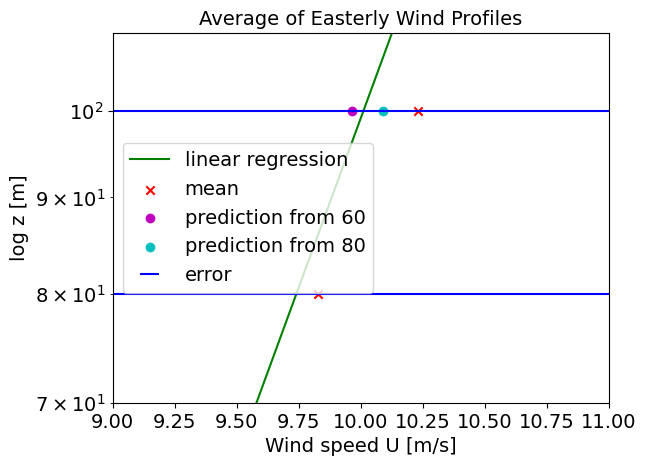

In [11]:
# QUESTION 2d 

plot_linear_regression_logy(slopeb, interceptb, x, y, color='g', label='linear regression')
plt.errorbar(U, z, xerr = x_error, fmt ='none', color='b', label='error')
plt.scatter(U, z, marker='x', color='r', label='mean')


U60_mean = U[2]
U80_mean = U[3]
U100_mean = U[4]
z60 = z[2]
z80 = z[3]
z100 = z[4]

#U100_60 = (np.log(z100)-np.log(z60))/slope + U60_mean
#U100_80 = (np.log(z100)-np.log(z80))/slope + U80_mean

U100_60 = ustar_mean/k * np.log(z100/z60) + U60_mean
U100_80 = ustar_mean/k * np.log(z100/z80) + U80_mean

print(f"U100 mean = {U100_mean:.2f}")
print(f"U100 from 60 = {U100_60:.2f} with percentage difference = {abs((U100_60-U100_mean))/U100_mean*100:.2f} % ")
print(f"U100 from 80 = {U100_80:.2f} with percentage difference = {abs((U100_80-U100_mean))/U100_mean*100:.2f} % ")

plt.scatter(U100_60, z100, color='m', label='prediction from 60')
plt.scatter(U100_80, z100, color='c', label='prediction from 80')


plt.xlabel('Wind speed U [m/s]')
plt.ylabel('log z [m]')
plt.legend(loc='center left')
plt.title('Average of Easterly Wind Profiles')

plt.yscale("log")
plt.xlim(9,11)
plt.ylim(70,110)

plt.show()


Equation of the line: y = 6.97990 x -11.53145
first value 9.816462609281567e-06
estimated alpha = 0.14
estimated z0 = 0.04


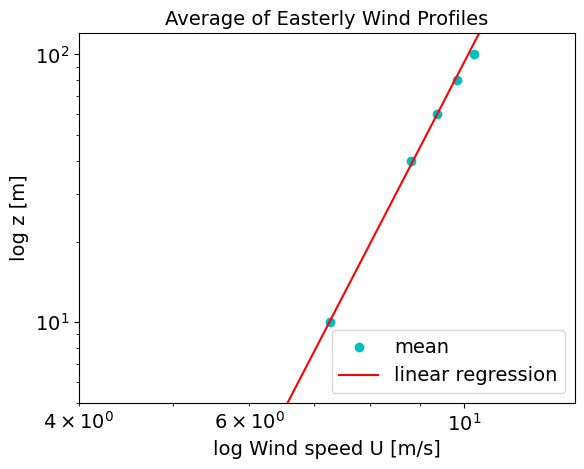

In [12]:
# QUESTION 2e

U_1080 = U[:-1]
z_1080 = z[:-1]

plt.scatter(U, z, marker='o', color='c', label = 'mean')
slope, intercept = linear_regression(np.log(U_1080), np.log(z_1080))
print(f"Equation of the line: y = {slope:.5f} x {intercept:.5f}")
plot_linear_regression_logxlogy(slope, intercept, np.log(U_1080), np.log(z_1080), color='r', label='linear regression')

alpha = 1/slope
print(f"estimated alpha = {alpha:.2f}")

z0_array = []
for i in range(len(z_1080)):
    z0 = z[i]*np.exp(-1/alpha)
    z0_array.append(z0)

z0_mean = np.mean(z0_array)
print(f"estimated z0 = {z0_mean:.2f}")

plt.xlabel('log Wind speed U [m/s]')
plt.ylabel('log z [m]')
plt.legend(loc='lower right')
plt.title('Average of Easterly Wind Profiles')

plt.yscale("log")
plt.xscale("log")

plt.xlim(4,13)
plt.ylim(5,120)

plt.show()
# estimated alpha = 0.17219
# estimated alpha = 0.16918

In [15]:
# QUESTION 2f

slopef, interceptf = linear_regression(np.log(U[:-1]), np.log(z[:-1]))
alpha_mean = 1/slopef

U60 = U[2]
U80 = U[3]
z60 = z[2]
z80 = z[3]

alpha_6080 = np.log(U80/U60)/np.log(z80/z60)

alpha_array = [alpha_mean, alpha_6080]

print('list of alpha:')
print(f"alpha mean    = {alpha_mean:.2f}  \nalpha from 6080 = {alpha_6080:.2f} \npercentual difference = {abs((alpha_6080-alpha_mean))/alpha_mean*100:.2f}%")



list of alpha:
alpha mean    = 0.14  
alpha from 6080 = 0.17 
percentual difference = 17.10%


In [17]:
# QUESTION 2g


U, U_std, ustar_mean = get_U(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
U_100 = U[4]

z100 = z[4]
U100_array = []
for alpha in alpha_array:
    value = U80*(z100/z80)**alpha
    U100_array.append(value)

U100_alpha = U100_array[0]
U100_6080 = U100_array[1]

print(f"U100 mean = {U_100:.2f}")
print(f"U100 from mean = {U100_alpha:.2f} with percentage difference = {abs((U100_alpha-U_100))/U_100*100:.2f} % ")
print(f"U100 from 6080 = {U100_6080:.2f} with percentage difference = {abs((U100_6080-U_100))/U_100*100:.2f} % ")

U100 mean = 10.23
U100 from mean = 10.14 with percentage difference = 0.85 % 
U100 from 6080 = 10.20 with percentage difference = 0.31 % 


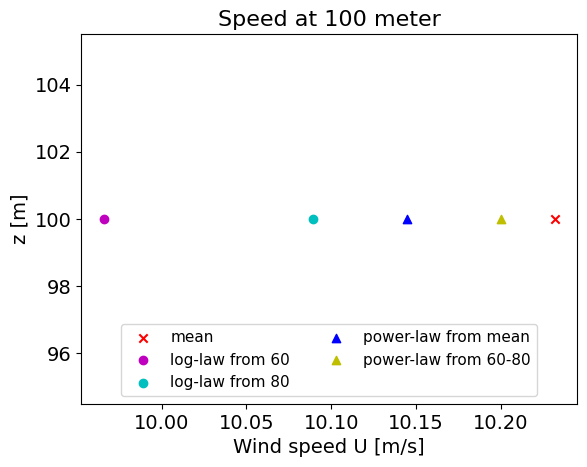

In [18]:
# QUESTION 2h


z100 = z[4]

plt.scatter(U[4], z100, marker='x', color = 'r', label='mean')

plt.scatter(U100_60, z100, marker='o', color= 'm', label='log-law from 60')
plt.scatter(U100_80, z100, marker='o', color = 'c', label='log-law from 80')

plt.scatter(U100_array[0], z100, marker='^', color = 'b', label='power-law from mean')
plt.scatter(U100_array[1], z100, marker='^', color = 'y', label='power-law from 60-80')



plt.rc('font', size=11)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.xlabel('Wind speed U [m/s]')
plt.ylabel('z [m]')
plt.legend(loc='lower right')
plt.title('Speed at 100 meter')

#plt.xlim(6.5,7)
#plt.ylim(99.5,100.5)
plt.legend(loc='lower center',ncol=2)
plt.show()



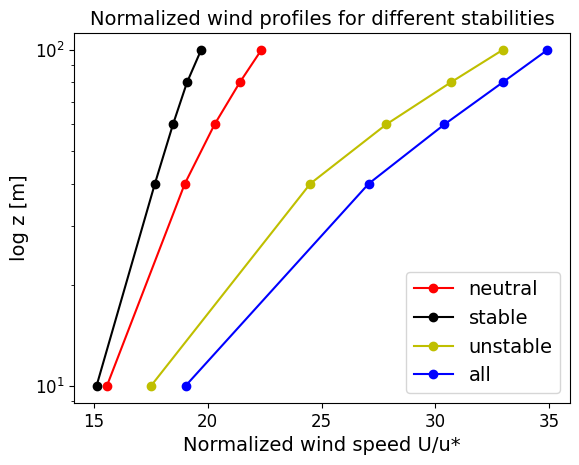

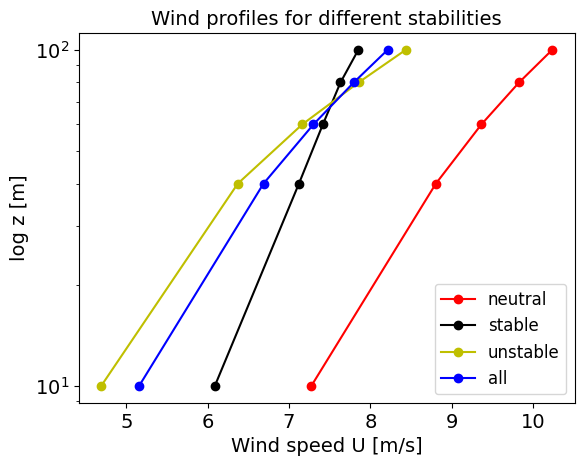

In [20]:
# QUESTION 3


Unorm_n, Unormn_std = get_Unorm_n(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Unorm_s, Unorms_std = get_Unorm_s(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Unorm_u, Unromu_std = get_Unorm_u(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Unorm_all, Unromall_std = get_Unorm_all(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)

Un, Un_std, ustar_meann = get_U(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Us, Us_std, ustar_means = get_U_s(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Uu, Uu_std, ustar_meanu = get_U_u(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Uall, Uall_std, ustar_mean_all = get_U_all(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)


plt.plot(Unorm_n, z, color='r', marker='o', label='neutral')
plt.plot(Unorm_s, z, color='k', marker='o',label='stable')
plt.plot(Unorm_u, z, color='y', marker='o',label='unstable')
plt.plot(Unorm_all, z, color='b',marker='o', label='all')
plot_format_instabilities_ustar()


plt.plot(Un, z, color='r', marker='o', label='neutral')
plt.plot(Us, z, color='k', marker='o',label='stable')
plt.plot(Uu, z, color='y', marker='o',label='unstable')
plt.plot(Uall, z, color='b',marker='o', label='all')

plot_format_instabilities()





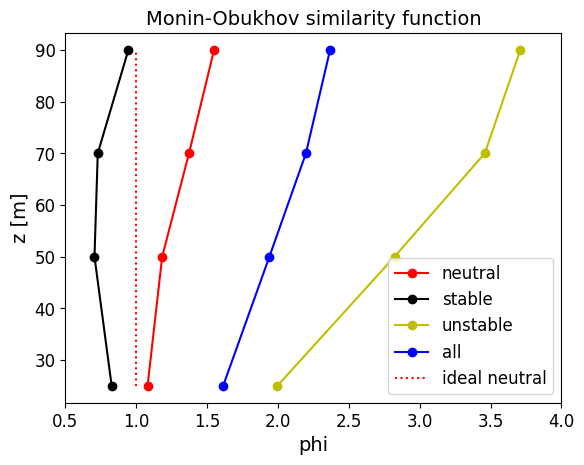

In [21]:
# QUESTION 4

Un, Un_std, ustar_meann = get_U(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Us, Us_std, ustar_means = get_U_s(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Uu, Uu_std, ustar_meanu = get_U_u(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Uall, Uall_std, ustar_meanall= get_U_all(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)



def compute_phi1(U,z,ustar,k):
    phi_list = []
    dUdz = []

    dUdz1 = 1/((z[1]-z[0])/(U[1]-U[0]))
    dUdz2 = 1/((z[2]-z[0])/(U[2]-U[0]))
    dUdz3 = 1/((z[3]-z[1])/(U[3]-U[1]))
    dUdz4 = 1/((z[4]-z[2])/(U[4]-U[2]))
    dUdz5 = 1/((z[4]-z[3])/(U[4]-U[3]))
    dUdz.append(dUdz1)
    dUdz.append(dUdz2)
    dUdz.append(dUdz3)
    dUdz.append(dUdz4)
    dUdz.append(dUdz5)
    
    for i in range(len(U)):
        phi = dUdz[i] * k * z[i] / ustar
        phi_list.append(phi)
    return phi_list

def compute_phi2(U,z,ustar,k):
    phi_list = []
    z_list = []

    for i in range(1,len(U)):
        z_intermediate = (z[i]+ z[i-1])/2
        dUdz = (U[i] - U[i-1])/(z[i]-z[i-1])
        phi = dUdz * k * z_intermediate / ustar

        z_list.append(z_intermediate)
        phi_list.append(phi)
    
    return phi_list, z_list


phin, z_intermediate = compute_phi2(Un,z,ustar_meann,k)
phis, z_intermediate = compute_phi2(Us,z,ustar_means,k)
phiu, z_intermediate = compute_phi2(Uu,z,ustar_meanu,k)
phiall, z_intermediate = compute_phi2(Uall,z,ustar_meanall,k)


plt.plot(phin, z_intermediate, color='r', linestyle='solid', label='neutral', marker='o')
plt.plot(phis, z_intermediate, color='k', linestyle='solid', label='stable',marker='o')
plt.plot(phiu, z_intermediate, color='y', linestyle='solid', label='unstable',marker='o')
plt.plot(phiall, z_intermediate, color='b', linestyle='solid', label='all',marker='o')

linea = np.full(len(z_intermediate), 1)
plt.plot(linea, z_intermediate, color='r', linestyle='dotted', label='ideal neutral')



def phi_formula_s(z,Lreciprocal):
    phi_array = []
    for i in range(len(z)):
        phi = 1 + 4.8*Lreciprocal*z[i]
        phi_array.append(phi)
    return phi_array

def phi_formula_u(z,Lreciprocal):
    phi_array = []
    for i in range(len(z)):
        phi = (1 - 19.3*Lreciprocal*z[i])**(-1/4)
        phi_array.append(phi)
    return phi_array


#phi_formula_s1 = phi_formula_s(z_intermediate,0.0025)
##phi_formula_s2 = phi_formula_s(z,0.05)
#plt.plot(phi_formula_s1, z_intermediate, color='k', linestyle='dashdot', label='stable function',marker='o')
##plt.plot(phi_formula_s2, z, color='k', linestyle='dotted', label='stable max')
#
#phi_formula_u1 = phi_formula_u(z_intermediate,-0.0008)
##phi_formula_u2 = phi_formula_u(z,0.05)
#plt.plot(phi_formula_u1, z_intermediate, color='y', linestyle='dashdot', label='unstable function',marker='o')
##plt.plot(phi_formula_u2, z, color='y', linestyle='dotted', label='unstable max')



plt.xlabel('phi')
plt.ylabel('z [m]')
plt.legend(loc='lower right')
plt.title('Monin-Obukhov similarity function')

plt.xlim(0.5,4)

plt.show()


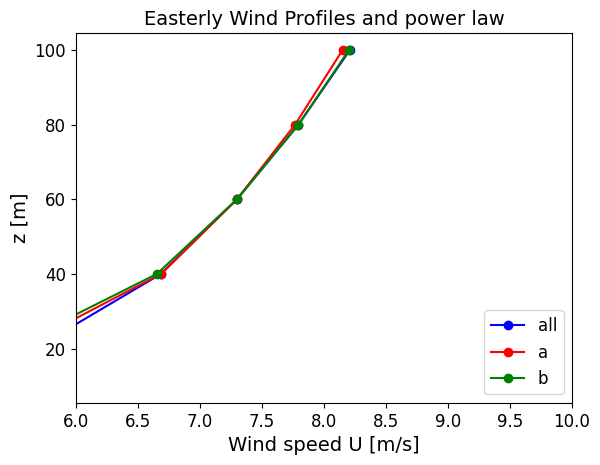

In [27]:
# QUESTION 7

def get_U_all2(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    u_star = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            V_all.append([V10[i], V40[i], V60[i], V80[i], V100[i]])
            u_star.append(ustar[i])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    ustar_mean = np.mean(u_star)
    return U, U_std, ustar_mean 


Uall, Uall_std, ustar_meanu = get_U_all2(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)

plt.plot(Uall, z, color='b',marker='o', label='all')

U40 = Uall[1]
U60 = Uall[2]
U80 = Uall[3]
z40 = z[1]
z60 = z[2]
z80 = z[3]

alpha_4060 = np.log(U40/U60) / np.log(z40/z60)
alpha_6080 = np.log(U60/U80) / np.log(z60/z80)

def power_law_profile(z, alpha, U_ref, z_ref):
    U_array = []
    for i in range(len(z)):
        U = U_ref*(z[i]/z_ref)**alpha 
        U_array.append(U)
    return U_array

U_a = power_law_profile(z,alpha_4060, U40, z40)
U_b = power_law_profile(z,alpha_6080, U80, z80)

plt.plot(U_a, z, color='r',marker='o', label='a')
plt.plot(U_b, z, color='g',marker='o', label='b')


plt.xlabel('Wind speed U [m/s]')
plt.ylabel('z [m]')
plt.legend(loc='lower right')
plt.title('Easterly Wind Profiles and power law')

#plt.yscale("log")
#plt.ylim(60,110)
plt.xlim(6,10)

plt.show()


